## Lista de exercícios - 010

### Francisco Romes da Silva Filho, 409976

## Resolva o problema de classificação binária sobre o dataset "Pima Indians Diabetes Database"

Montando o Drive!

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Imports de bibliotecas

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

### Dataset

In [3]:
# Pima Indians Diabetes Database
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/diabetes.csv')
print("Forma do dataset: ", data.shape[1], " features e ", data.shape[0], " amostras!")

Forma do dataset:  9  features e  768  amostras!


In [4]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
data.columns[-1]

'Outcome'

### 1. Separe os dados em treino (80%) e teste (20%).


In [6]:
X = data.drop(['Outcome'], axis=1)
y = data['Outcome']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

### 2. Crie um modelo de árvore de decisão sobre o conjunto de treino e faça o que se pede:


##### Criando modelo de DT

In [8]:
dt = tree.DecisionTreeClassifier(random_state=0)

In [9]:
dt = dt.fit(X_train, y_train)

In [10]:
dt.score(X_train, y_train)

1.0

#### 2.1 Mostre a importância das features.


In [11]:
print("Importância das features ==>", dt.feature_importances_)

Importância das features ==> [0.08951096 0.26930121 0.06620534 0.07107732 0.04582408 0.19529375
 0.14249679 0.12029053]


#### 2.2 Desenhe a árvore de decisão.


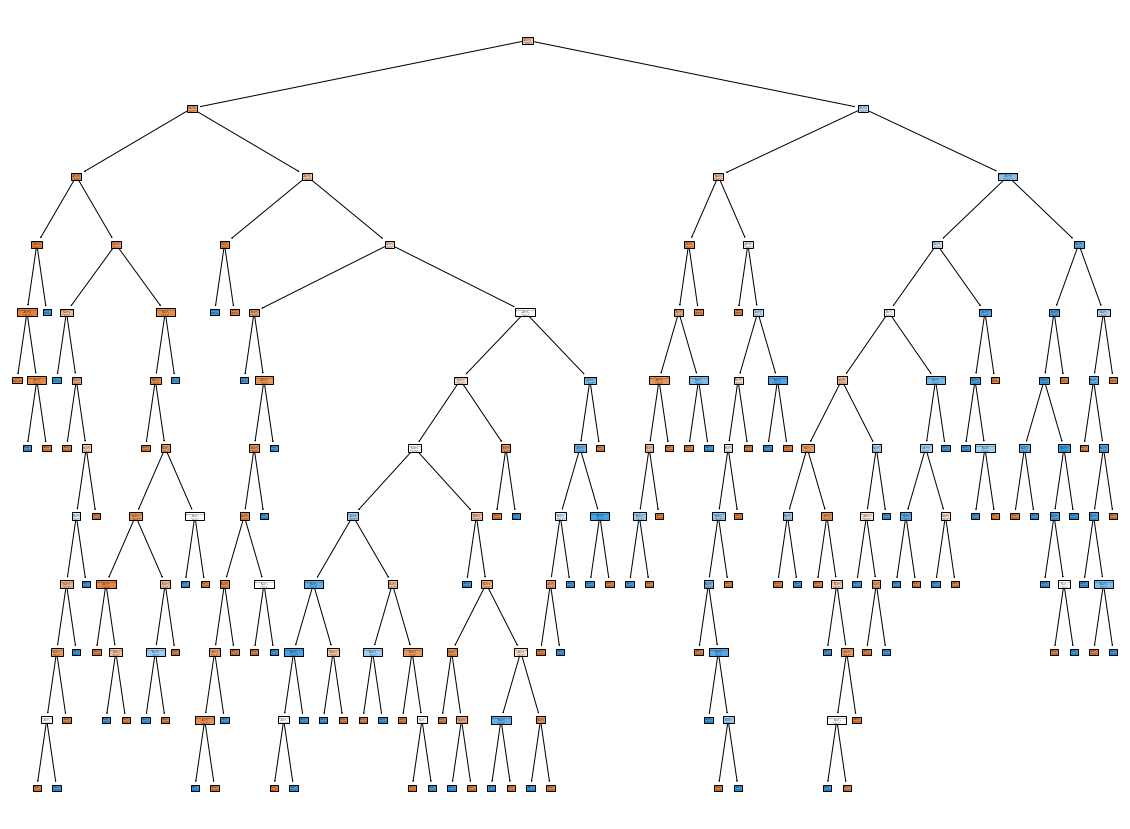

In [12]:
fig = plt.figure(figsize=(20,15))
_ = tree.plot_tree(dt, 
                   feature_names= data.columns,  
                   class_names= data.columns[-1],
                   filled=True)

#### 2.3 Calcule e mostre F1-Score sobre os dados de treino e sobre os dados de teste.

##### F1-Score sobre os dados de treino

In [13]:
y_pred = dt.predict(X_train)
f1_score(y_train, y_pred)

1.0

#### F1-Score sobre os dados de teste

In [14]:
y_pred = dt.predict(X_test)

In [15]:
f1_score(y_test, y_pred)

0.5

### 3. Crie um modelo ensemble de Votação (MajorityVoteClassifier) sobre o conjunto de treino usando pelo menos 3 algoritmos de aprendizado de máquina. Compare o resultado de usar os modelos isoladamente com o resultado usando o MajorityVoteClassifier sobre o conjunto de teste usando a métrica F1-Score. Pode se basear no seguinte documento, mas não precisa usar k-Fold Cross Validation.

#### Os 4 modelos escolhidos

In [16]:
# Modelos
knn = KNeighborsClassifier()
dt = tree.DecisionTreeClassifier(random_state=0)
lr = LogisticRegression(solver='liblinear', random_state=0)
gnb = GaussianNB()

In [17]:
models = [ ('k-NN', knn), 
               ('Decision Tree', dt),
               ('Logistic Regression', lr),
              ('Naive Bayes', gnb)              
               ]

#### Resultados dos modelos usados de forma isolada

In [18]:
for model_name, model in models:
    
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)

    print('{:s} com F1-Score = {:.3f}'.format(model_name, f1_score(y_test, y_pred)))

k-NN com F1-Score = 0.673
Decision Tree com F1-Score = 0.500
Logistic Regression com F1-Score = 0.652
Naive Bayes com F1-Score = 0.660


#### Usando Voting Classifier

In [19]:
model_vc = VotingClassifier(estimators=models)
model_vc.fit(X_train, y_train)


VotingClassifier(estimators=[('k-NN',
                              KNeighborsClassifier(algorithm='auto',
                                                   leaf_size=30,
                                                   metric='minkowski',
                                                   metric_params=None,
                                                   n_jobs=None, n_neighbors=5,
                                                   p=2, weights='uniform')),
                             ('Decision Tree',
                              DecisionTreeClassifier(ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features=None,
                                                     max_leaf_nodes=None,
                                                     min_

In [20]:
y_pred = model_vc.predict(X_test)
print('Voting Classifier: {:.3f}'.format(f1_score(y_test, y_pred)))

Voting Classifier: 0.607


### 4. Avalie agora as técnicas de Bagging (BaggingClassifier) usando árvores de decisão (DecisionTreeClassifier), RandomForest, AdaBoost e GradientBoosting sobre o conjunto de teste usando a métrica F1-Score. Mostre também a importância das features para cada uma das técnicas. Para usar o BaggingClassifier, você pode se basear no seguinte documento.

#### Modelos

In [21]:
# modelo de de Bagging
rf = RandomForestClassifier(random_state=0)

# modelos de Boosting
ada = AdaBoostClassifier(random_state=0)
dt = tree.DecisionTreeClassifier(random_state=0)
gb = GradientBoostingClassifier(random_state=15)

In [22]:
models  = [('Random Forest', rf),
          ('AdaBoost',ada), 
          ('Decision Tree', dt),
          ('Gradient Boosting',gb)]

#### Apresentando os modelos individualmente e as importâncias das features para cada um.

In [23]:
for model_name, model in models:
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    f1 = f1_score(y_test, y_pred)
    fi = model.feature_importances_
    print(model_name)

    print("Importância das Features ==>", fi)
    print("F1-Score", f1)
    print("\n")


Random Forest
Importância das Features ==> [0.09045004 0.22915842 0.09011725 0.0744252  0.07355953 0.16327258
 0.1256205  0.15339648]
F1-Score 0.7010309278350516


AdaBoost
Importância das Features ==> [0.04 0.26 0.1  0.06 0.1  0.12 0.2  0.12]
F1-Score 0.6868686868686867


Decision Tree
Importância das Features ==> [0.08951096 0.26930121 0.06620534 0.07107732 0.04582408 0.19529375
 0.14249679 0.12029053]
F1-Score 0.5


Gradient Boosting
Importância das Features ==> [0.0444958  0.38128404 0.05666506 0.01869506 0.04729116 0.18041722
 0.10747907 0.1636726 ]
F1-Score 0.72




#### Usando BaggingClassifier

In [24]:
model_bc = BaggingClassifier(base_estimator=dt, n_estimators=300, oob_score=True, n_jobs=-1)
model_bc.fit(X_train, y_train)
y_pred = model_bc.predict(X_test)
f1 = f1_score(y_test, y_pred)
print("F1-Score: ", f1)

F1-Score:  0.707070707070707


In [25]:
for model_name, model in models:
    model_bc = BaggingClassifier(base_estimator=model, n_estimators=300, oob_score=True, n_jobs=-1)
    model_bc.fit(X_train, y_train)
    y_pred = model_bc.predict(X_test)
    f1 = f1_score(y_test, y_pred)
    print("Usando base_estimator =", model_name)
    print("F1-Score", f1)
    print("\n")

Usando base_estimator = Random Forest
F1-Score 0.6808510638297872


Usando base_estimator = AdaBoost
F1-Score 0.6666666666666666


Usando base_estimator = Decision Tree
F1-Score 0.6458333333333334


Usando base_estimator = Gradient Boosting
F1-Score 0.72


